so I will have data as ndarray at bottleneck as N by D
I will have the class labels acquired by kmeans
I want to find correspondance samples as
a) two random samples that are in cluster
b) some sample and the center sample

which wil be acquired as in and out indices by a function that takes nxd array and cluster labels

In [1]:
import importlib as impL
import sys
sys.path.insert(1,'/home/doga/GithUBuntU/keyhandshapediscovery/vae_torch')
sys.path.insert(1,'/home/doga/GithUBuntU/keyhandshapediscovery')
import vae_torch_model as vtm
import helperFuncs as funcH
import numpy as np

/home/doga/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/doga/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/doga/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/doga/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:5

In [2]:
def load_from_saved_corr_file(fn = '/home/doga/Desktop/correspondance_find.npz'):
    a = np.load(fn)
    predictions = a['predictions']
    bottleneck_vec = a['bottleneck_vec']
    labels = a['labels']
    print("loaded from file - ", fn)
    print(predictions.shape)
    print(bottleneck_vec.shape)
    print(labels.shape)
    return bottleneck_vec, predictions, labels

def analyze_corresondance_results(correspondance_tuple, centroid_df, pred_vec, lab_vec):
    df = pd_df({'labels': lab_vec[np.asarray(centroid_df['sampleID'], dtype=int)],
                'klusterID': np.asarray(centroid_df['klusterID'], dtype=int),
                'sampleCounts': np.asarray(centroid_df['num_of_samples'], dtype=int)})
    print('correspondance results({:}):'.format(len(correspondance_tuple[0])))
    print(df.groupby(['labels'])[['labels', 'sampleCounts']].sum())
    corr_in_clust = pred_vec[correspondance_tuple[0]]
    corr_ou_clust = pred_vec[correspondance_tuple[1]]
    _confMat_corr_preds = confusion_matrix(corr_in_clust, corr_ou_clust)
    acc_corr_preds = 100 * np.sum(np.diag(_confMat_corr_preds)) / np.sum(
        np.sum(_confMat_corr_preds))
    print("_confMat_corr_preds - acc({:6.4f})".format(acc_corr_preds))

    corr_in_labels = lab_vec[correspondance_tuple[0]]
    corr_ou_labels = lab_vec[correspondance_tuple[1]]
    _confMat_corr = confusion_matrix(corr_in_labels, corr_ou_labels)
    acc_corr = 100 * np.sum(np.diag(_confMat_corr)) / np.sum(np.sum(_confMat_corr))
    print("confMat - acc({:6.4f}), correspondance match:\n".format(acc_corr), pd_df(_confMat_corr))

b_v = np.random.rand(10,3)
#print(b_v)

In [288]:
# np.savez('/home/doga/Desktop/correspondance_find.npz', bottleneck_vec=bottleneck_vec, predictions=pred_vec, labels=lab_vec)
bottleneck_vec, pred_vec, lab_vec = load_from_saved_corr_file('/home/doga/Desktop/correspondance_find.npz')

loaded from file -  /home/doga/Desktop/correspondance_find.npz
(60000,)
(60000, 32)
(60000,)


In [295]:
correspondance_type = 'knear1'
impL.reload(funcH)
correspondance_tuple, centroid_df = funcH.get_cluster_correspondance_ids(X=bottleneck_vec, cluster_ids=pred_vec,
                                    correspondance_type=correspondance_type,
                                    verbose=0)

shuffle all


In [296]:
analyze_corresondance_results(correspondance_tuple, centroid_df, pred_vec, lab_vec)

correspondance results(120000):
        labels  sampleCounts
labels                      
0            0         13657
1            1          1966
2            2          1914
3            6          3587
4           16          7756
5           25          9618
6           18          5802
7           21          5847
8           16          3937
9           27          5916
_confMat_corr_preds - acc(100.0000)
confMat - acc(9.7900), correspondance match:
       0     1     2     3     4     5     6     7     8     9
0  1198  1255  1151  1175  1248  1225  1167  1153  1207  1182
1  1255  1180  1187  1172  1193  1271  1194  1262  1234  1207
2  1151  1187  1160  1181  1138  1150  1190  1148  1175  1228
3  1175  1172  1181  1204  1203  1201  1258  1229  1170  1213
4  1248  1193  1138  1203  1136  1233  1201  1185  1190  1144
5  1225  1271  1150  1201  1233  1152  1221  1199  1252  1195
6  1167  1194  1190  1258  1201  1221  1112  1241  1197  1215
7  1153  1262  1148  1229  1185  1199  124

In [178]:
impL.reload(funcH)
corr_inds, centroid_df = funcH.get_cluster_correspondance_ids(b_v, cluster_ids=[0,0,0,0,1,1,2,2,1,1], correspondance_type="knear4", verbose=0)
print(pd_df({"in":corr_inds[0],"out":corr_inds[1]}))
print(centroid_df)

    in  out
0    0    1
1    4    1
2    5    2
3    5    1
4    3    1
5    4    3
6    0    3
7    1    2
8    2    2
9    3    3
10   2    1
11   3    2
12   8    0
13   5    3
14   1    1
15   7    1
16   8    1
17   8    3
18   5    0
19   8    2
20   4    0
21   1    3
22   3    0
23   9    2
24   9    1
25   0    0
26   9    0
27   1    0
28   6    0
29   7    0
30   9    3
31   0    2
32   2    0
33   6    1
34   4    2
35   2    3
   klusterID  sampleID  distanceEuc  num_of_samples
0          0         2     0.194758               4
1          1         9     0.467323               4
2          2         6     0.511955               2


In [272]:
a,  centroid_df = get_cluster_correspondance_ids(bottleneck_vec, predictions, correspondance_type="shuffle")

In [47]:
import vae_scripts as vs

In [ ]:
vs.run_compare_list(experiments_folder="/home/doga/DataFolder/vaesae_experiments_cor",
                     data_log_keys=['tr_te', 'te'],
                     loss_key_list=[ 'bottleneck_kmeans', 'reconstruction'],
                     exp_base_name='exp_linear_vae_FMNIST_is28_cf',
                     ae_f_name_base='ae_ft_linear_vae_FMNIST_is28.npy')

tr_te  - log is loaded with len:  1000
te  - log is loaded with len:  1000
skipping -  valid loss
skipping -  reconstruction
bottleneck_kmeans :
tr_te: min(@epoc370:18.6367), max(@epoc515:64.5383), max_list([516  15 518  18 515])
te: min(@epoc860:16.5300), max(@epoc516:64.4500), max_list([201 427 514 515 516])
0*/home/doga/DataFolder/vaesae_experiments_cor/exp_linear_vae_FMNIST_is28_cf516/btl_000_tr_va_.png*
0*/home/doga/DataFolder/vaesae_experiments_cor/exp_linear_vae_FMNIST_is28_cf516/btl_000_tr_te_.png*
1*/home/doga/DataFolder/vaesae_experiments_cor/exp_linear_vae_FMNIST_is28_cf516/btl_499_tr_va_.png*
1*/home/doga/DataFolder/vaesae_experiments_cor/exp_linear_vae_FMNIST_is28_cf516/btl_499_tr_te_.png*
2*/home/doga/DataFolder/vaesae_experiments_cor/exp_linear_vae_FMNIST_is28_cf516/btl_999_tr_va_.png*
2*/home/doga/DataFolder/vaesae_experiments_cor/exp_linear_vae_FMNIST_is28_cf516/btl_999_tr_te_.png*


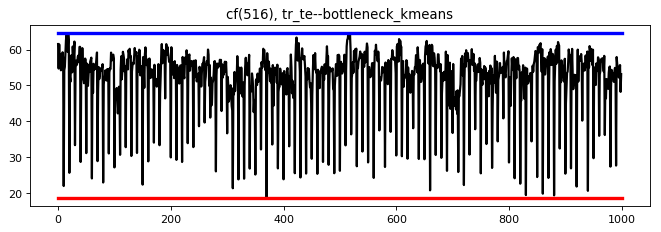

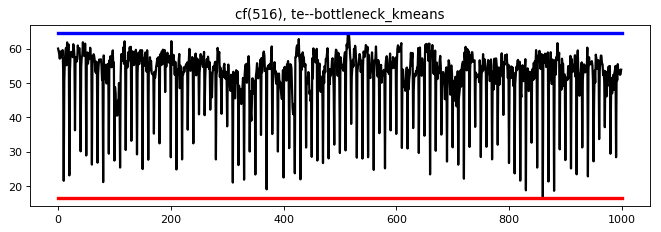

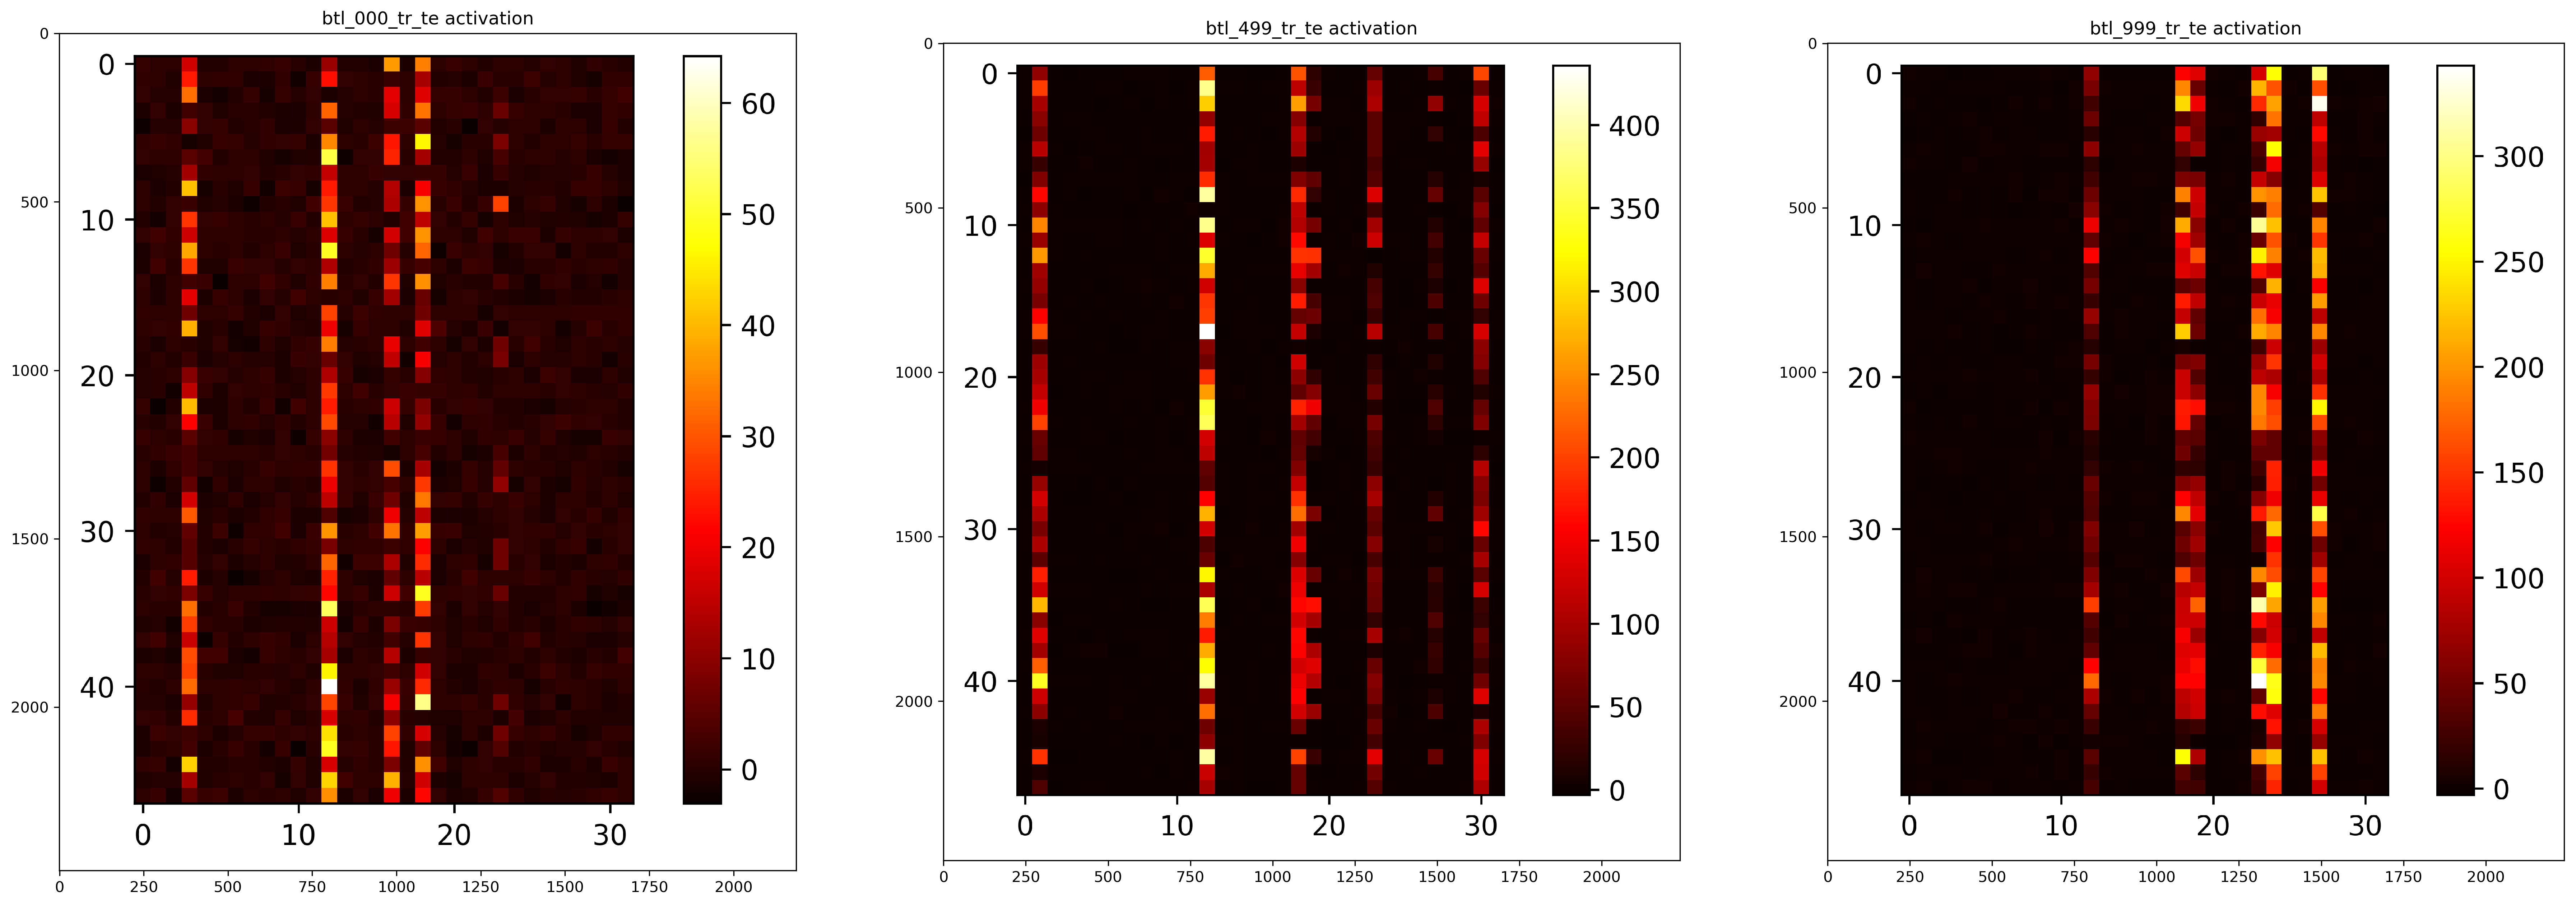

In [25]:
import vae_utils as vu
impL.reload(vu)
vu.plot_cf(cf_int=516, data_log_keys = ['tr_te', 'te'], max_act_ep=None, plot_cnt = 3,
            select_id_type='linspace', k_loss_disp_list={'bottleneck_kmeans'},
            experiments_folder='/home/doga/DataFolder/vaesae_experiments_cor',
            exp_base_name='exp_linear_vae_FMNIST_is28_cf',
            plt_min_max_lines=True)

In [148]:
get_cluster_correspondance_ids(b_v, cluster_ids=[0,0,0,0,1,1,2,2,1,1], correspondance_type="knear3", verbose=1)

(45,)
(10, 10)


IndexError: index 4 is out of bounds for axis 0 with size 4

In [212]:
bottleneck_vec, pred_vec, labels = load_from_saved_corr_file('/home/doga/Desktop/correspondance_find_2.npz')

loaded from file -  /home/doga/Desktop/correspondance_find_2.npz
(60000,)
(60000, 32)
(60000,)


In [235]:
bottleneck_vec = b_v
pred_vec=np.asarray([0,0,0,0,1,1,2,2,1,1],dtype=int)
labels=np.asarray([2,2,2,1,0,0,0,3,3,3],dtype=int)

In [240]:
correspondance_tuple

(array([2, 9, 2, 7, 3, 3, 4, 0, 6, 8, 1, 5, 7, 5, 9, 4, 0, 6, 1, 8]),
 array([0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 3, 2, 1, 1, 1, 2, 3]))

In [247]:
correspondance_type = 'knear2'
impL.reload(funcH)
correspondance_tuple, centroid_df = funcH.get_cluster_correspondance_ids(X=bottleneck_vec, cluster_ids=pred_vec,
                                                             correspondance_type=correspondance_type,
                                                             verbose=5)


***
knear-row0
 [0 1 2 3]
cluster_inds:
 [0 1 2 3]
d_inds in: [[1 2]
 [2 0]
 [1 0]
 [2 0]]
i =  0
sidx = 
 [0 0 1 1 2 2 3 3]
d_inds = 
 [1 2 2 0 1 0 2 0]
iin_cur.shape(8,), out_cur.shape(8,)
iin= [0 0 1 1 2 2 3 3]
out= [1 2 2 0 1 0 2 0]

***
knear-row1
 [4 5 8 9]
cluster_inds:
 [4 5 8 9]
d_inds in: [[2 1]
 [3 0]
 [0 3]
 [1 2]]
i =  1
sidx = 
 [4 4 5 5 8 8 9 9]
d_inds = 
 [8 5 9 4 4 9 5 8]
iin_cur.shape(8,), out_cur.shape(8,)
iin= [4 4 5 5 8 8 9 9]
out= [8 5 9 4 4 9 5 8]

***
knear-row2
 [6 7]
cluster_inds:
 [6 7]
d_inds in: [[1 0]
 [0 1]]
i =  2
sidx = 
 [6 6 7 7]
d_inds = 
 [7 6 6 7]
iin_cur.shape(4,), out_cur.shape(4,)
iin= [6 6 7 7]
out= [7 6 6 7]
shuffle all
inds_in.shape(20,), inds_out.shape(20,)


In [248]:
from sklearn.metrics import confusion_matrix
impL.reload(funcH)


In [249]:
analyze_corresondance_results(correspondance_tuple, centroid_df, pred_vec, labels)

correspondance results:
        labels  sampleCounts
labels                      
0            0             2
2            2             4
3            3             4
_confMat_corr_preds - acc(100.0000)
confMat - acc(60.0000), correspondance match:
    0  1  2  3
0  3  0  0  3
1  0  0  2  0
2  0  0  6  0
3  3  0  0  3


In [243]:
d_inds = np.asarray([2,1,3,0,0,3,1,2], dtype=int)
cluster_inds = np.asarray([4,5,8,9], dtype=int)

In [244]:
d_inds

array([2, 1, 3, 0, 0, 3, 1, 2])

In [245]:
cluster_inds

array([4, 5, 8, 9])

array([8, 5, 9, 4, 4, 9, 5, 8])